Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Epoch 1/20
32/32 [==============================] - 3s 75ms/step - loss: 0.7080 - accuracy: 0.5063 - val_loss: 0.6939 - val_accuracy: 0.4800
Epoch 2/20
32/32 [==============================] - 2s 69ms/step - loss: 0.6925 - accuracy: 0.4875 - val_loss: 0.6894 - val_accuracy: 0.6800
Epoch 3/20
32/32 [==============================] - 2s 68ms/step - loss: 0.6911 - accuracy: 0.5250 - val_loss: 0.6847 - val_accuracy: 0.7000
Epoch 4/20
32/32 [==============================] - 2s 70ms/step - loss: 0.6763 - accuracy: 0.5938 - val_loss: 0.6712 - val_accuracy: 0.6000
Epoch 5/20
32/32 [==============================] - 2s 68ms/step - loss: 0.6853 - accuracy: 0.5875 - val_loss: 0.7068 - val_accuracy: 0.4400
Epoch 6/20
32/32 [==============================] - 2s 69ms/step - loss: 0.6763 - accuracy: 0.5500 - val_loss: 0.6768 - val_accuracy: 0.4600
Epoch 7/20
32/32 [==============================] - 2s 69ms/step - loss:

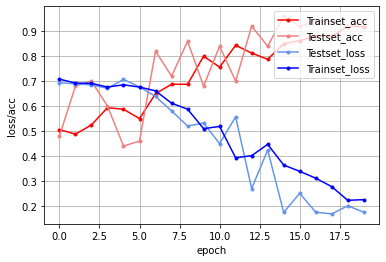

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics
 
np.random.seed(3)
tf.random.set_seed(3)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory('./train', 
                                                   target_size=(150,150),
                                                   batch_size=5,
                                                   class_mode='binary')

test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory('./test',
                                                 target_size=(150,150),
                                                 batch_size=5,
                                                 class_mode='binary')
                                                 
                                                 
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

history=model.fit(train_generator, epochs=20, 
                   validation_data = test_generator, 
                   validation_steps=10)
                   
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()


16/16 [==============================] - 2s 137ms/step - loss: 0.5715 - accuracy: 0.7375 - val_loss: 0.5996 - val_accuracy: 0.5900
Epoch 8/50
16/16 [==============================] - 2s 145ms/step - loss: 0.5253 - accuracy: 0.7812 - val_loss: 0.5283 - val_accuracy: 0.7000
Epoch 9/50
 4/16 [======>.......................] - ETA: 1s - loss: 0.5042 - accuracy: 0.7250